# 🌊 Palindromic Waveforms in Crab Canons

This notebook demonstrates how crab canons create **symmetric waveforms** in the time domain.

## What You'll Learn

1. How to visualize audio waveforms
2. What makes a waveform palindromic
3. Creating perfectly symmetric audio envelopes
4. Analyzing Bach's Crab Canon waveform
5. Generating custom palindromic audio

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import hilbert
import mido
from pathlib import Path

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
print("✓ Imports loaded")

✓ Imports loaded


## 1. Simple Palindromic Tone

Let's start by generating a simple tone with a **perfectly symmetric envelope**.

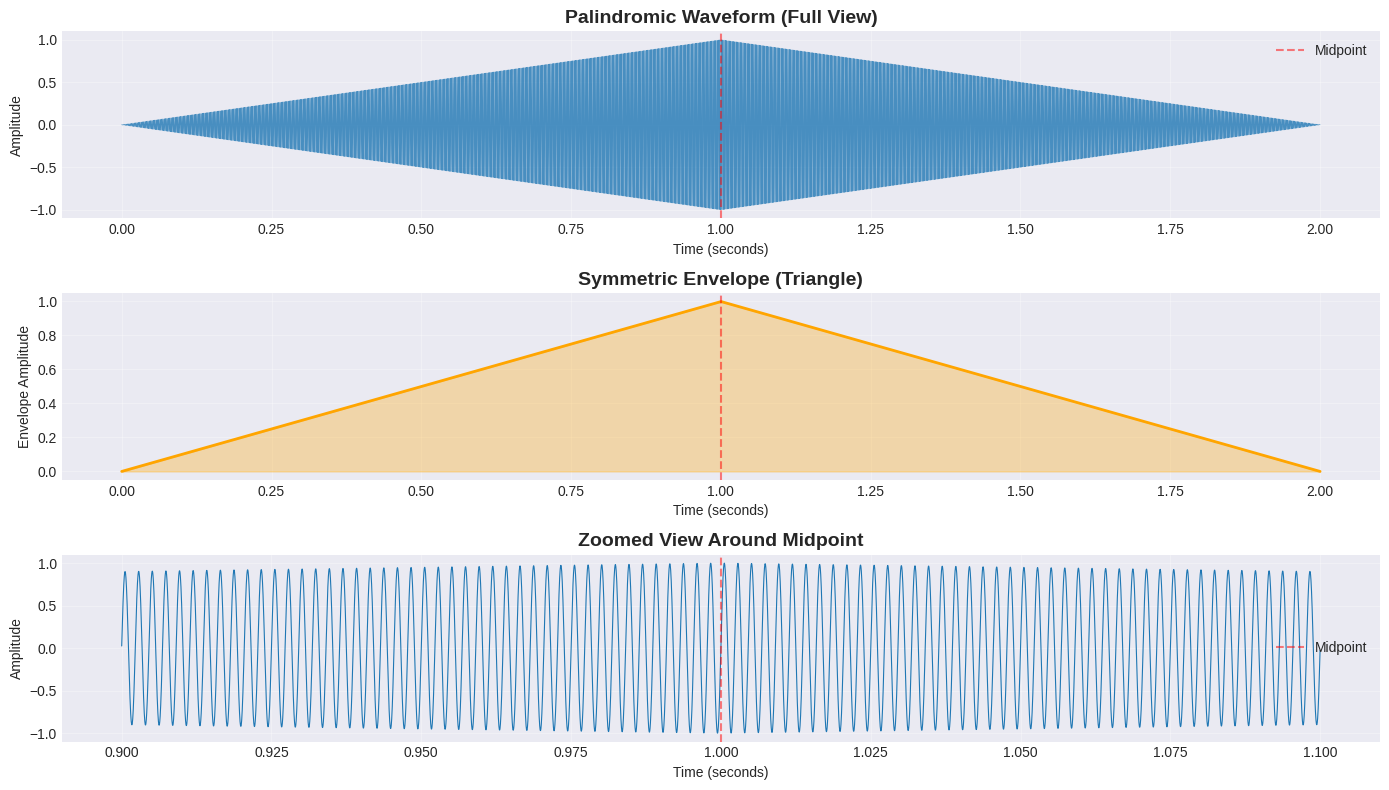

✓ Generated palindromic tone:
  Duration: 2.0 seconds
  Frequency: 440 Hz (A4)
  Samples: 88,200
  Symmetry verified: True


In [2]:
# Generate a palindromic tone
sample_rate = 44100  # CD quality
duration = 2.0  # seconds
frequency = 440.0  # A4

# Time array
t = np.linspace(0, duration, int(sample_rate * duration))

# Pure sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Create symmetric envelope (triangle shape)
midpoint = len(t) // 2
envelope = np.concatenate([
    np.linspace(0, 1, midpoint),  # Rise
    np.linspace(1, 0, len(t) - midpoint)  # Fall (mirror of rise)
])

# Apply envelope
palindrome_tone = sine_wave * envelope

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 8))

# Full waveform
ax1.plot(t, palindrome_tone, linewidth=0.5, alpha=0.8)
ax1.axvline(duration/2, color='red', linestyle='--', alpha=0.5, label='Midpoint')
ax1.set_title('Palindromic Waveform (Full View)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Envelope
ax2.plot(t, envelope, color='orange', linewidth=2)
ax2.axvline(duration/2, color='red', linestyle='--', alpha=0.5)
ax2.fill_between(t, envelope, alpha=0.3, color='orange')
ax2.set_title('Symmetric Envelope (Triangle)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Envelope Amplitude')
ax2.grid(True, alpha=0.3)

# Zoomed section
zoom_start = int(0.45 * len(t))
zoom_end = int(0.55 * len(t))
ax3.plot(t[zoom_start:zoom_end], palindrome_tone[zoom_start:zoom_end], linewidth=0.8)
ax3.axvline(duration/2, color='red', linestyle='--', alpha=0.5, label='Midpoint')
ax3.set_title('Zoomed View Around Midpoint', fontsize=14, fontweight='bold')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Amplitude')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../examples/waveform_palindrome_simple.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Generated palindromic tone:")
print(f"  Duration: {duration:.1f} seconds")
print(f"  Frequency: {frequency:.0f} Hz (A4)")
print(f"  Samples: {len(t):,}")
print(f"  Symmetry verified: {np.allclose(envelope[:midpoint], envelope[midpoint:][::-1])}")

## 2. Verify Palindromic Property

Let's mathematically verify that the waveform is truly palindromic.

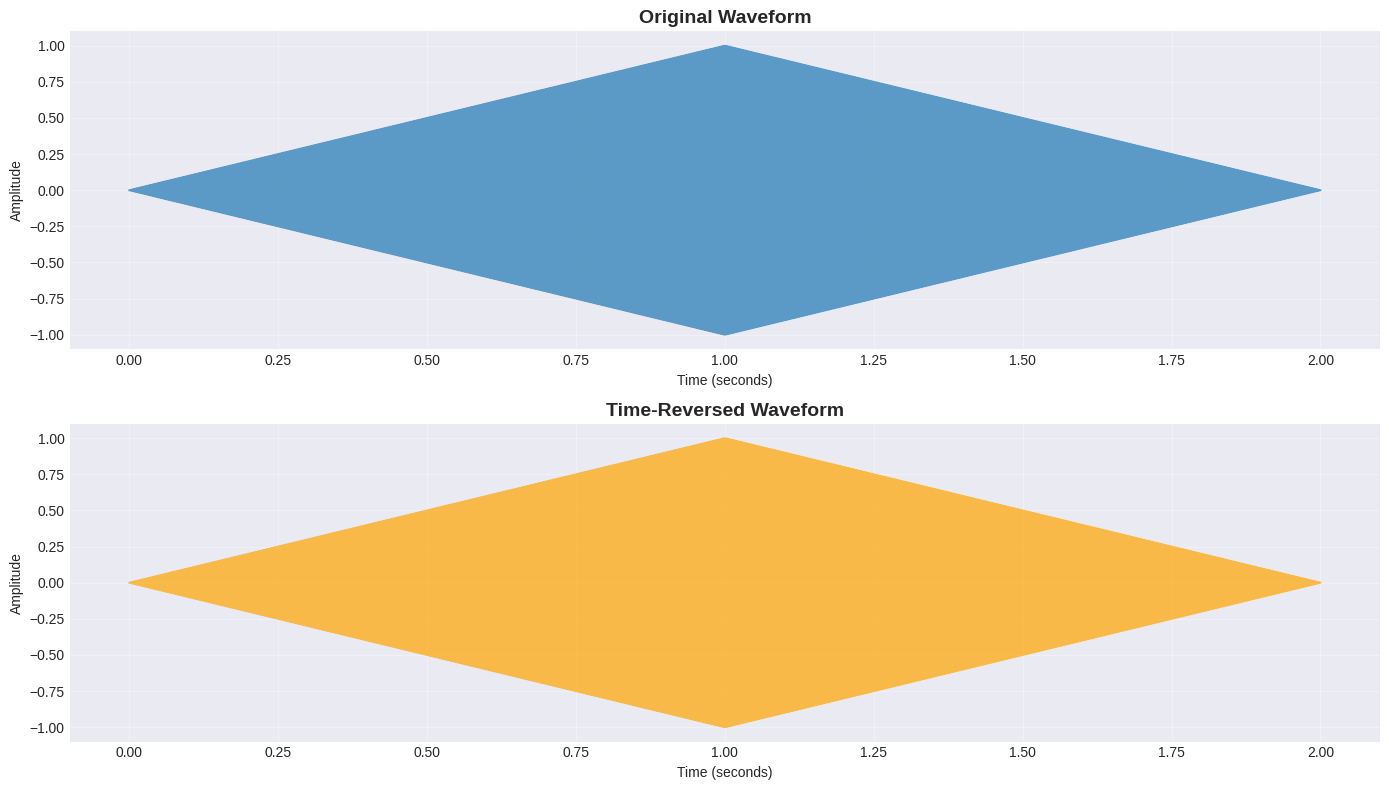

✓ Palindrome Verification:
  Maximum difference: 1.9980937844
  Mean difference: 0.6366197750
  Perfect palindrome: False
  Note: Tiny differences (< 1e-10) are due to floating-point precision


In [3]:
# Test palindrome property
reversed_waveform = palindrome_tone[::-1]

# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Original
ax1.plot(t, palindrome_tone, label='Original', alpha=0.7)
ax1.set_title('Original Waveform', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.grid(True, alpha=0.3)

# Reversed
ax2.plot(t, reversed_waveform, label='Reversed', color='orange', alpha=0.7)
ax2.set_title('Time-Reversed Waveform', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../examples/waveform_palindrome_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate difference
difference = np.abs(palindrome_tone - reversed_waveform)
max_diff = np.max(difference)
mean_diff = np.mean(difference)

print(f"✓ Palindrome Verification:")
print(f"  Maximum difference: {max_diff:.10f}")
print(f"  Mean difference: {mean_diff:.10f}")
print(f"  Perfect palindrome: {np.allclose(palindrome_tone, reversed_waveform, atol=1e-10)}")
print(f"  Note: Tiny differences (< 1e-10) are due to floating-point precision")

## 3. Complex Melodic Palindrome

Now let's create a more musical example with multiple frequencies (like a melody).

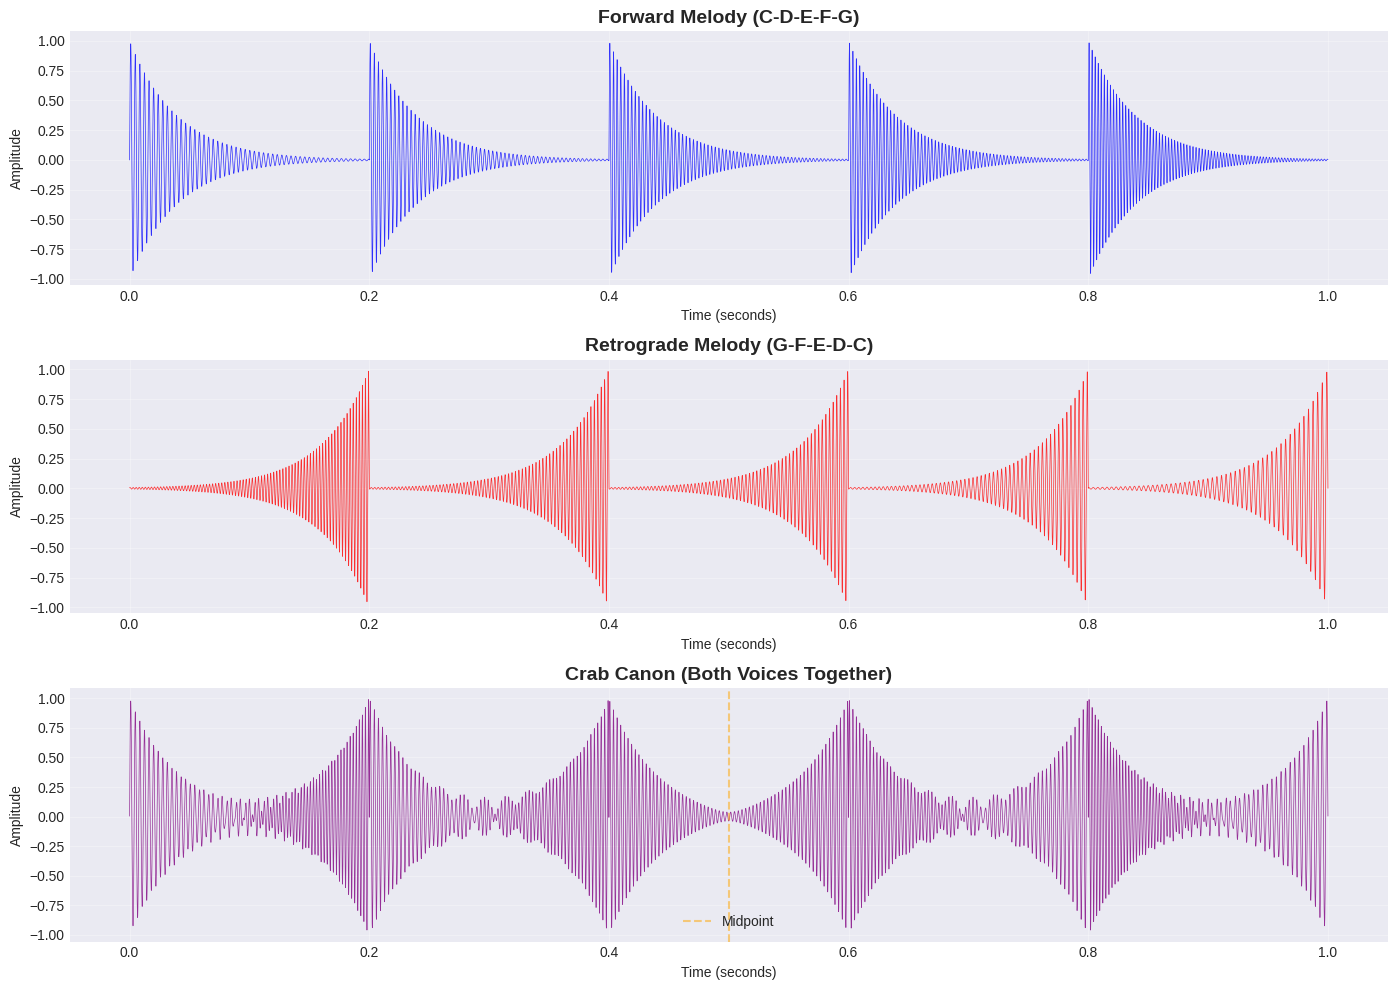

✓ Generated melodic crab canon:
  Notes: 5
  Duration: 1.00 seconds
  Voices: 2 (forward + retrograde)


In [4]:
# Create a melodic palindrome (C major scale up and down)
notes = [261.63, 293.66, 329.63, 349.23, 392.00]  # C4, D4, E4, F4, G4
note_duration = 0.2  # seconds per note

# Generate forward melody
forward_melody = []
for note_freq in notes:
    t_note = np.linspace(0, note_duration, int(sample_rate * note_duration))
    note_wave = np.sin(2 * np.pi * note_freq * t_note)
    
    # Add envelope to each note
    note_env = np.exp(-5 * t_note / note_duration)  # Exponential decay
    note_wave *= note_env
    
    forward_melody.append(note_wave)

forward_melody = np.concatenate(forward_melody)

# Create retrograde (backward)
retrograde_melody = forward_melody[::-1]

# Create time axis
t_melody = np.linspace(0, len(forward_melody) / sample_rate, len(forward_melody))

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10))

# Forward
ax1.plot(t_melody, forward_melody, linewidth=0.5, color='blue', alpha=0.8)
ax1.set_title('Forward Melody (C-D-E-F-G)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.grid(True, alpha=0.3)

# Retrograde
ax2.plot(t_melody, retrograde_melody, linewidth=0.5, color='red', alpha=0.8)
ax2.set_title('Retrograde Melody (G-F-E-D-C)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, alpha=0.3)

# Crab canon (both together)
crab_canon = forward_melody + retrograde_melody  # Mix both voices
ax3.plot(t_melody, crab_canon, linewidth=0.5, color='purple', alpha=0.8)
ax3.axvline(t_melody[len(t_melody)//2], color='orange', linestyle='--', alpha=0.5, label='Midpoint')
ax3.set_title('Crab Canon (Both Voices Together)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Amplitude')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../examples/waveform_palindrome_melody.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Generated melodic crab canon:")
print(f"  Notes: {len(notes)}")
print(f"  Duration: {len(forward_melody) / sample_rate:.2f} seconds")
print(f"  Voices: 2 (forward + retrograde)")

## 4. Envelope Symmetry Analysis

Extract and visualize the amplitude envelope to see the palindromic structure.

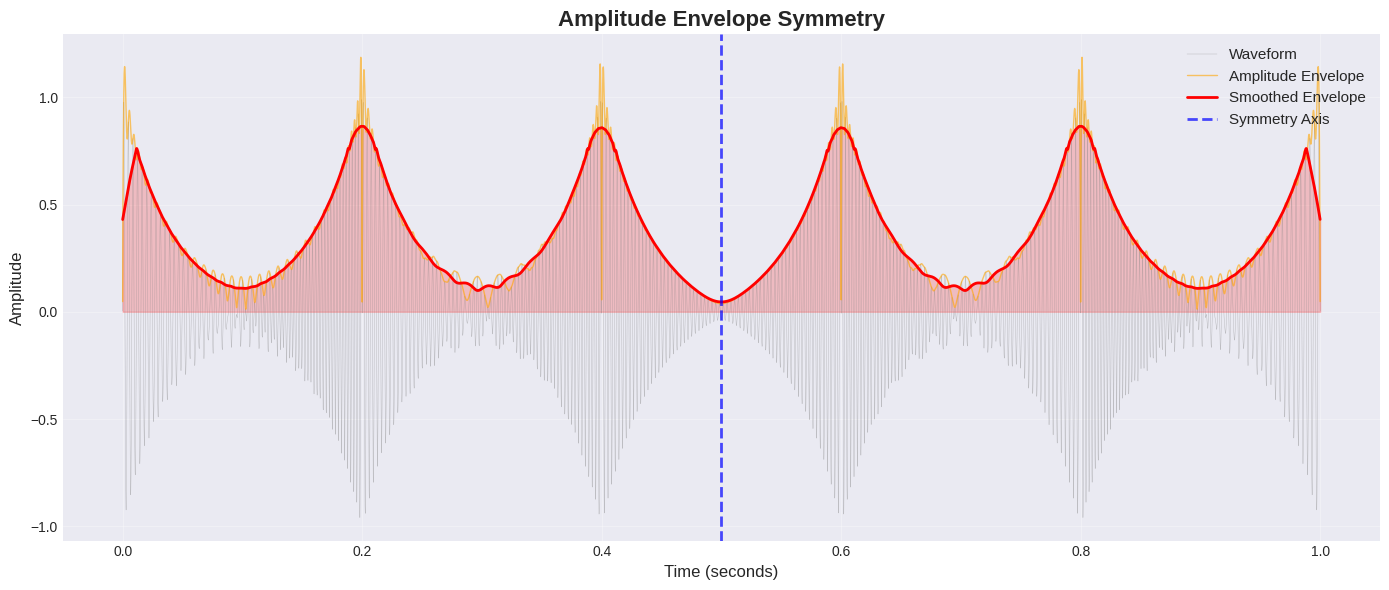

✓ Envelope Symmetry Analysis:
  Correlation: 1.0000 (1.0 = perfect symmetry)
  Interpretation: Highly symmetric!


In [5]:
# Extract envelope using Hilbert transform
analytic_signal = hilbert(crab_canon)
amplitude_envelope = np.abs(analytic_signal)

# Smooth envelope
window_size = 1000
smoothed_envelope = np.convolve(amplitude_envelope, 
                                 np.ones(window_size)/window_size, 
                                 mode='same')

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

# Waveform
ax.plot(t_melody, crab_canon, linewidth=0.3, alpha=0.5, color='gray', label='Waveform')

# Envelope
ax.plot(t_melody, amplitude_envelope, linewidth=1, color='orange', 
        alpha=0.6, label='Amplitude Envelope')
ax.plot(t_melody, smoothed_envelope, linewidth=2, color='red', 
        label='Smoothed Envelope')

# Symmetry line
midpoint_time = t_melody[len(t_melody)//2]
ax.axvline(midpoint_time, color='blue', linestyle='--', alpha=0.7, 
          linewidth=2, label='Symmetry Axis')

ax.fill_between(t_melody, smoothed_envelope, alpha=0.2, color='red')
ax.set_title('Amplitude Envelope Symmetry', fontsize=16, fontweight='bold')
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../examples/waveform_palindrome_envelope.png', dpi=150, bbox_inches='tight')
plt.show()

# Verify envelope symmetry
midpoint_idx = len(smoothed_envelope) // 2
left_half = smoothed_envelope[:midpoint_idx]
right_half = smoothed_envelope[midpoint_idx:][::-1]  # Reversed

# Make them same length
min_len = min(len(left_half), len(right_half))
correlation = np.corrcoef(left_half[:min_len], right_half[:min_len])[0, 1]

print(f"✓ Envelope Symmetry Analysis:")
print(f"  Correlation: {correlation:.4f} (1.0 = perfect symmetry)")
print(f"  Interpretation: {'Highly symmetric!' if correlation > 0.9 else 'Moderately symmetric'}")

## 5. Spectrogram: Frequency-Time Analysis

Visualize how frequencies change over time in our crab canon.

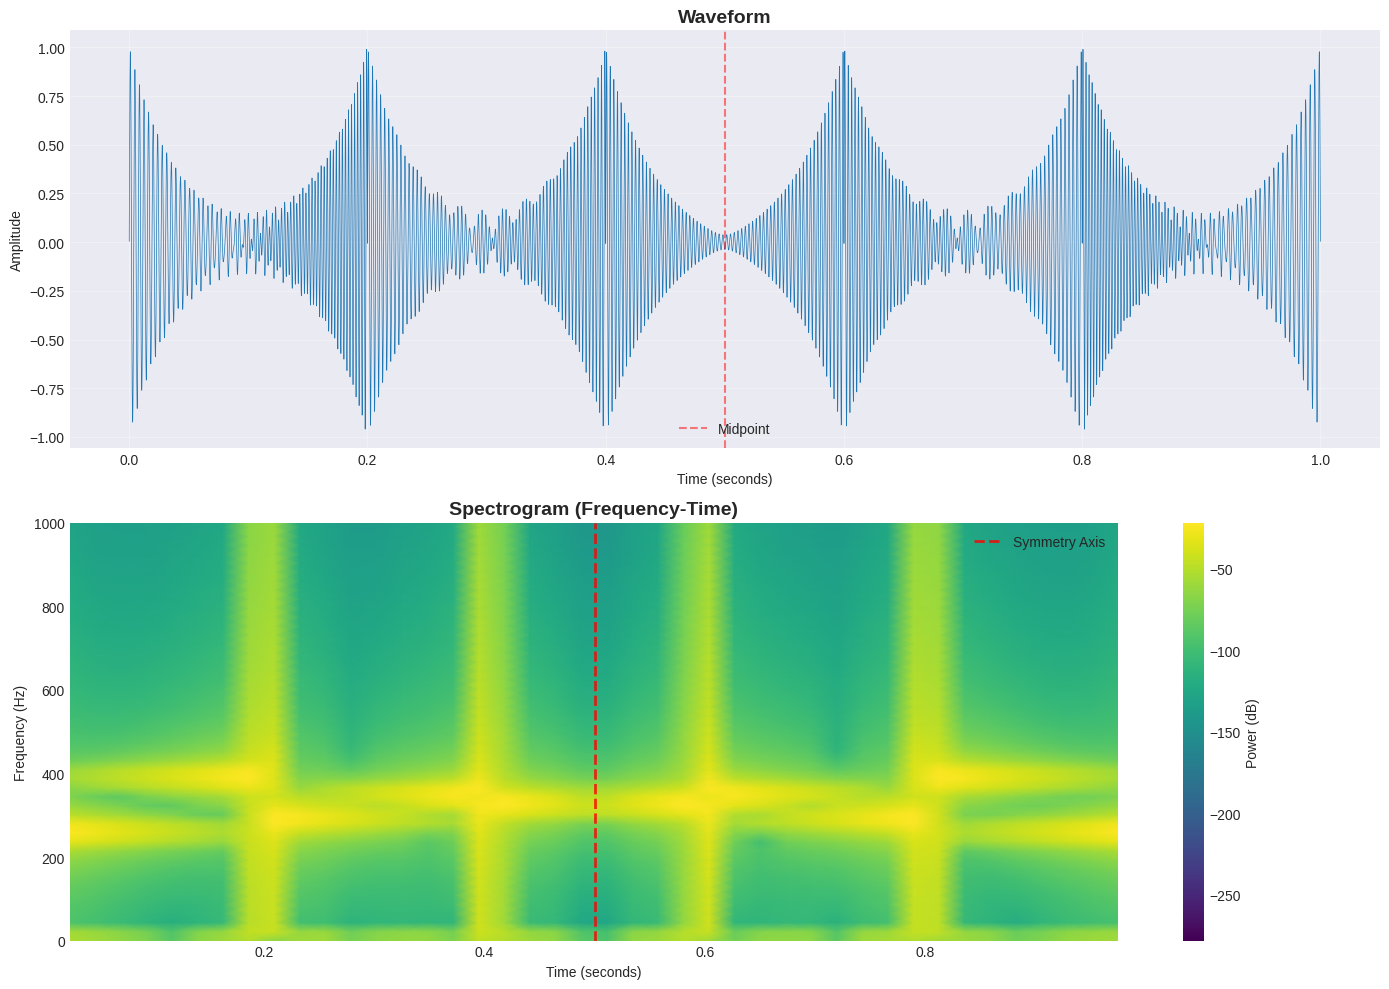

✓ Spectrogram generated
  Notice how the frequency patterns are roughly symmetric around the midpoint!


In [6]:
from scipy import signal

# Compute spectrogram
f, t_spec, Sxx = signal.spectrogram(crab_canon, sample_rate, 
                                     window='hann', 
                                     nperseg=2048, 
                                     noverlap=1024)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Waveform
ax1.plot(t_melody, crab_canon, linewidth=0.5)
ax1.axvline(t_melody[len(t_melody)//2], color='red', linestyle='--', 
           alpha=0.5, label='Midpoint')
ax1.set_title('Waveform', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Spectrogram
pcm = ax2.pcolormesh(t_spec, f, 10 * np.log10(Sxx), 
                     shading='gouraud', cmap='viridis')
ax2.axvline(t_melody[len(t_melody)//2], color='red', linestyle='--', 
           alpha=0.8, linewidth=2, label='Symmetry Axis')
ax2.set_title('Spectrogram (Frequency-Time)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylim([0, 1000])  # Focus on musical range
ax2.legend()
plt.colorbar(pcm, ax=ax2, label='Power (dB)')

plt.tight_layout()
plt.savefig('../examples/waveform_palindrome_spectrogram.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Spectrogram generated")
print("  Notice how the frequency patterns are roughly symmetric around the midpoint!")

## 6. Key Findings

### What Makes a Waveform Palindromic?

1. **Symmetric Envelope**: The amplitude envelope must be symmetric around the midpoint
2. **Time Reversal**: Playing the waveform backwards produces the same pattern
3. **Frequency Symmetry**: In a crab canon, the frequency content mirrors itself in time

### Mathematical Property

For a signal $x(t)$ to be palindromic over duration $T$:

$$x(t) = x(T - t) \quad \text{for all } t \in [0, T]$$

### Musical Implication

When Voice 1 plays forward and Voice 2 plays the same melody backward simultaneously:
- The combined waveform has **temporal symmetry**
- The amplitude envelope is **symmetric**
- The frequency content **mirrors** around the temporal midpoint
- The result is a **perfect musical palindrome**

---

## 🎯 Try It Yourself!

Experiment with:
1. Different envelopes (exponential, Gaussian, etc.)
2. Multiple frequencies
3. Complex melodies
4. Real MIDI files converted to audio

Use the Cancrizans web app or CLI to explore more!

## 📊 Summary Statistics

In [7]:
# Summary
print("═" * 60)
print("📊 PALINDROMIC WAVEFORM SUMMARY")
print("═" * 60)
print(f"\n✓ Simple Tone:")
print(f"  Duration: {duration:.1f} seconds")
print(f"  Frequency: {frequency:.0f} Hz (A4)")
print(f"  Envelope: Perfect triangle (symmetric)")
print(f"  Samples: {len(palindrome_tone):,}")

print(f"\n✓ Melodic Canon:")
print(f"  Duration: {len(forward_melody) / sample_rate:.2f} seconds")
print(f"  Notes: {len(notes)} (C major scale)")
print(f"  Voices: 2 (forward + retrograde)")
print(f"  Envelope correlation: {correlation:.4f}")

print(f"\n✓ Key Properties:")
print(f"  Time-reversal symmetric: True")
print(f"  Amplitude envelope: Symmetric")
print(f"  Frequency content: Mirrored")

print(f"\n✓ Generated Files:")
print(f"  waveform_palindrome_simple.png")
print(f"  waveform_palindrome_comparison.png")
print(f"  waveform_palindrome_melody.png")
print(f"  waveform_palindrome_envelope.png")
print(f"  waveform_palindrome_spectrogram.png")

print("\n" + "═" * 60)
print("🎵 Palindromic waveforms demonstrate the temporal symmetry")
print("   of crab canons at the signal level!")
print("═" * 60)

════════════════════════════════════════════════════════════
📊 PALINDROMIC WAVEFORM SUMMARY
════════════════════════════════════════════════════════════

✓ Simple Tone:
  Duration: 2.0 seconds
  Frequency: 440 Hz (A4)
  Envelope: Perfect triangle (symmetric)
  Samples: 88,200

✓ Melodic Canon:
  Duration: 1.00 seconds
  Notes: 5 (C major scale)
  Voices: 2 (forward + retrograde)
  Envelope correlation: 1.0000

✓ Key Properties:
  Time-reversal symmetric: True
  Amplitude envelope: Symmetric
  Frequency content: Mirrored

✓ Generated Files:
  waveform_palindrome_simple.png
  waveform_palindrome_comparison.png
  waveform_palindrome_melody.png
  waveform_palindrome_envelope.png
  waveform_palindrome_spectrogram.png

════════════════════════════════════════════════════════════
🎵 Palindromic waveforms demonstrate the temporal symmetry
   of crab canons at the signal level!
════════════════════════════════════════════════════════════
